In [20]:
import funcs.data_wrangling as dw
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import rcParams
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

rcParams['figure.figsize'] = 15, 5

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = dw.ons_data(freq='h', ano_inicio=2000, ano_fim=2023, idreg="S")
df = dw.pipeline(data, update=False)

Descritivo

In [3]:
df.head()

,id_reg,desc_reg,load_mwmed
date,,,
2000-01-01 00:00:00,S,SUL,5777.0
2000-01-01 01:00:00,S,SUL,5580.7
2000-01-01 02:00:00,S,SUL,5098.7
2000-01-01 03:00:00,S,SUL,4753.7
2000-01-01 04:00:00,S,SUL,4584.1


In [4]:
df.tail()

,date,id_reg,desc_reg,load_mwmed
203035,2023-02-28 19:00:00,S,SUL,15729.787
203036,2023-02-28 20:00:00,S,SUL,15462.559
203037,2023-02-28 21:00:00,S,SUL,15239.738
203038,2023-02-28 22:00:00,S,SUL,14644.277
203039,2023-02-28 23:00:00,S,SUL,13548.623


In [5]:
df.sample(5)

,date,id_reg,desc_reg,load_mwmed
152929,2017-06-12 01:00:00,S,SUL,7333.173
89801,2010-03-30 17:00:00,S,SUL,10831.460
12035,2001-05-16 11:00:00,S,SUL,8193.000
190659,2021-10-01 03:00:00,S,SUL,9666.414
9056,2001-01-12 08:00:00,S,SUL,7514.600


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203040 entries, 0 to 203039
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        203040 non-null  datetime64[ns]
 1   id_reg      203040 non-null  object        
 2   desc_reg    203040 non-null  object        
 3   load_mwmed  203040 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 6.2+ MB


In [7]:
df.reset_index().describe(include='all')

,index,date,id_reg,desc_reg,load_mwmed
count,203040.000000,203040,203040,203040,203040.000000
unique,NaN,203040,1,1,NaN
top,NaN,2000-01-01 00:00:00,S,SUL,NaN
freq,NaN,1,203040,203040,NaN
first,NaN,2000-01-01 00:00:00,NaN,NaN,NaN
last,NaN,2023-02-28 23:00:00,NaN,NaN,NaN
mean,101519.500000,NaN,NaN,NaN,9298.189359
std,58612.743666,NaN,NaN,NaN,2559.348673
min,0.000000,NaN,NaN,NaN,3615.830005
25%,50759.750000,NaN,NaN,NaN,7410.587250


In [8]:
df.isna().sum()

date          0
id_reg        0
desc_reg      0
load_mwmed    0
dtype: int64

In [9]:
zeros = (df["load_mwmed"] == 0).sum()
print(f"Zeros: {zeros} ({zeros/df.shape[0]:%})")

Zeros: 0 (0.000000%)


Visualização

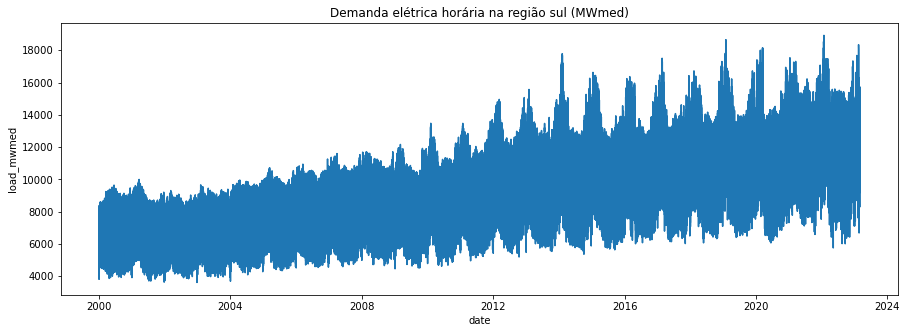

In [8]:
plt.figure()

sns.lineplot(x = "date", y = "load_mwmed", data = df)

plt.title("Demanda elétrica horária na região sul (MWmed)")

plt.show()

In [9]:
df_seasonal = data.seasonal_components
df_seasonal["load_mwmed"] = df["load_mwmed"]
df_seasonal

,data,ano,trimestre,mes,semana_ano,dia,dia_ano,dia_semana,hora,apagao,load_mwmed
0,2000-01-01 00:00:00,2000,1,1,52,1,1,6,0,0,NaN
1,2000-01-01 01:00:00,2000,1,1,52,1,1,6,1,0,NaN
2,2000-01-01 02:00:00,2000,1,1,52,1,1,6,2,0,NaN
3,2000-01-01 03:00:00,2000,1,1,52,1,1,6,3,0,NaN
4,2000-01-01 04:00:00,2000,1,1,52,1,1,6,4,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
203035,2023-02-28 19:00:00,2023,1,2,9,28,59,2,19,0,NaN
203036,2023-02-28 20:00:00,2023,1,2,9,28,59,2,20,0,NaN
203037,2023-02-28 21:00:00,2023,1,2,9,28,59,2,21,0,NaN
203038,2023-02-28 22:00:00,2023,1,2,9,28,59,2,22,0,NaN


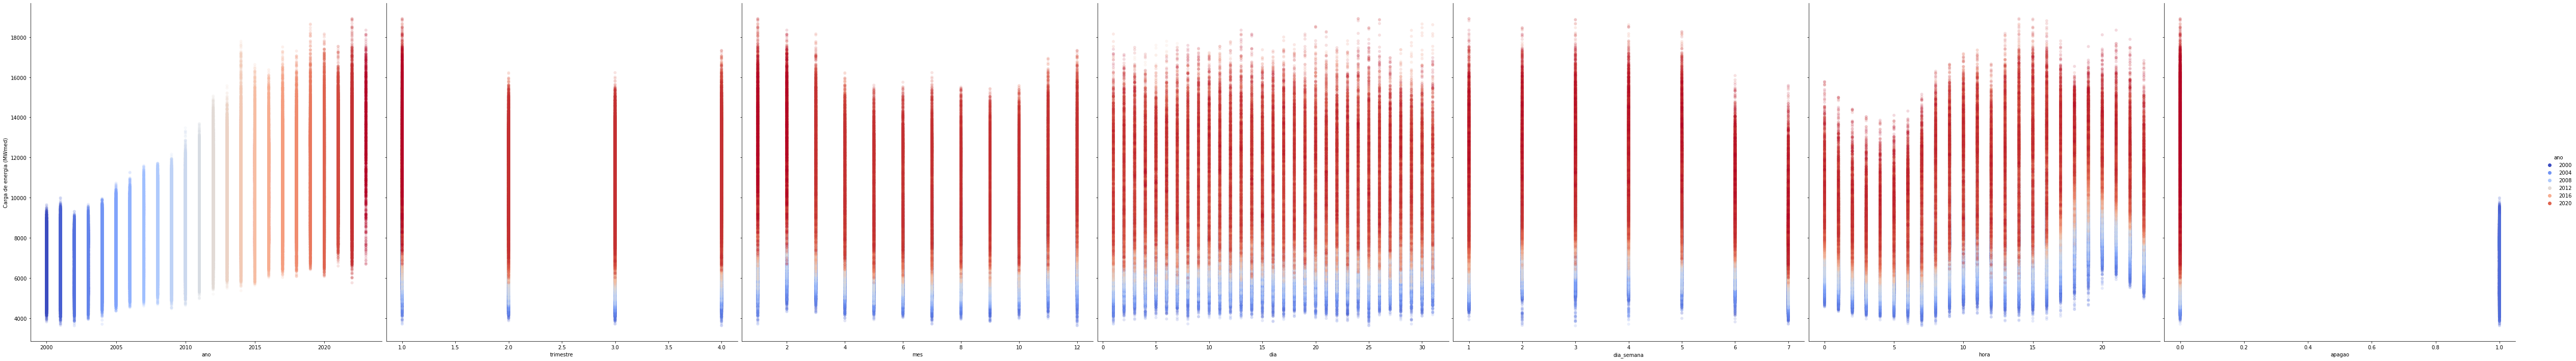

In [13]:
g = sns.pairplot(df_seasonal, 
             hue = "ano", 
             x_vars = [ "ano", "trimestre", "mes", "dia", "dia_semana", "hora", "apagao"],
             y_vars = "load_mwmed",
             height = 10,
             plot_kws={'alpha':0.15, 'linewidth':0, 'palette': 'coolwarm'})

g.axes.flat[0].set_ylabel("Carga de energia (MWmed)")

plt.show()

(-0.5, 1.1)

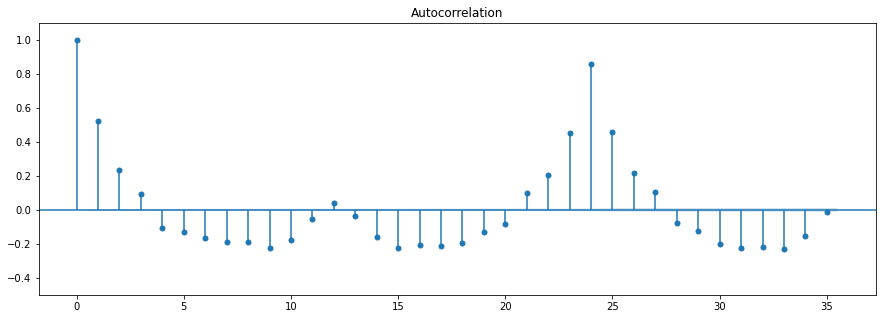

In [25]:
#plot_acf(df_load_sul["load_mwmed"], title = "Autocorrelação da série em nível", lags=35)
plot_acf(df["load_mwmed"].diff().dropna(), lags=35)
plt.ylim(-0.5,1.1)
#plt.show()

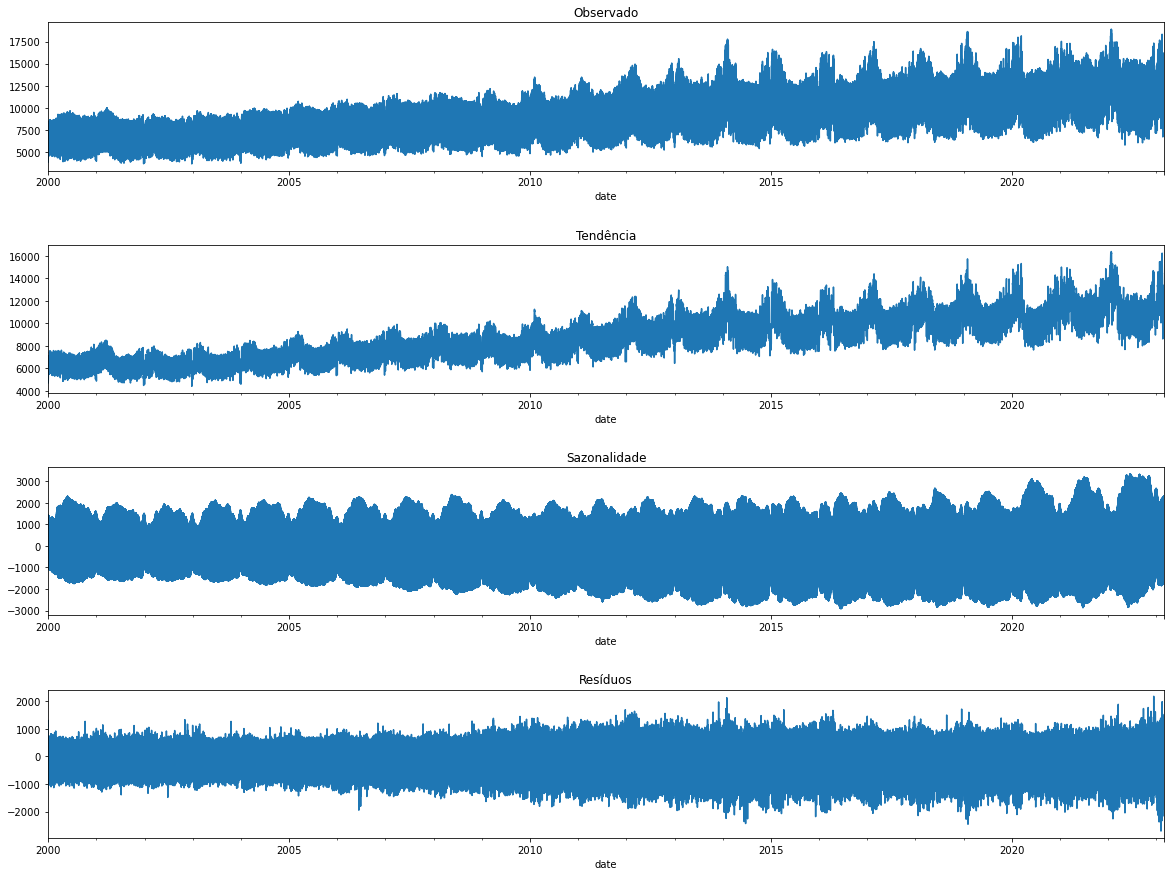

In [27]:
df2 = pd.Series(df["load_mwmed"], index=df.index)
df2 = df2.asfreq('h')


fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, figsize = (20,15))
decompose_data = STL(df2, period=24, seasonal=25)
decompose_data = decompose_data.fit()

decompose_data.observed.plot(ax = ax1, title = "Observado")
decompose_data.trend.plot(ax = ax2, title = "Tendência")
decompose_data.seasonal.plot(ax = ax3, title = "Sazonalidade")
decompose_data.resid.plot(ax = ax4, title = "Resíduos")

plt.subplots_adjust(hspace= 0.5)
plt.show()